In [45]:
import pandas as pd
data = pd.read_excel("DATA/Train/serration_prediction_train.xlsx")


In [46]:
data = data[[i for i in data.columns if i not in ('result')]]

data.head()

,shape,profile_entrance,profile_exit,rising_entrance,rising_exit,shards,feathering,entrance_mounding,center_mounding,exit_mounding,mounding
0,indeterminate,V,V,single,single,absent,absent,single,absent,single,not marked
1,indeterminate,I/,V,single,bilateral,absent,absent,single,absent,single,not marked
2,indeterminate,I/,V,single,bilateral,absent,absent,single,absent,bilateral,not marked
3,indeterminate,I/,V,single,bilateral,absent,absent,single,absent,bilateral,not marked
4,indeterminate,I/,V,single,bilateral,absent,absent,single,absent,bilateral,not marked


In [47]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 
for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

In [48]:
data_encoded.head()

,shape,profile_entrance,profile_exit,rising_entrance,rising_exit,shards,feathering,entrance_mounding,center_mounding,exit_mounding,mounding
0,2,1,1,2,2,0,0,2,0,2,4
1,2,0,1,2,1,0,0,2,0,2,5
2,2,0,1,2,1,0,0,2,0,1,5
3,2,0,1,2,1,0,0,2,0,1,5
4,2,0,1,2,1,0,0,2,0,1,5


In [49]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [50]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



df

,shape,profile_entrance,profile_exit,rising_entrance,rising_exit,shards,feathering,entrance_mounding,center_mounding,exit_mounding,mounding
shape,1.00,0.32,0.16,0.05,0.07,0.12,0.04,0.03,0.02,0.03,0.10
profile_entrance,0.32,0.98,0.13,0.08,0.03,0.02,0.04,0.02,0.01,0.00,0.07
profile_exit,0.16,0.13,0.98,0.08,0.04,0.10,0.15,0.03,0.02,0.08,0.15
rising_entrance,0.05,0.08,0.08,1.00,0.18,0.05,0.06,0.04,0.03,0.02,0.05
rising_exit,0.07,0.03,0.04,0.18,1.00,0.03,0.04,0.02,0.04,0.07,0.04
shards,0.12,0.02,0.10,0.05,0.03,0.96,0.18,0.04,0.05,0.12,0.19
feathering,0.04,0.04,0.15,0.06,0.04,0.18,1.00,0.04,0.03,0.08,0.13
entrance_mounding,0.03,0.02,0.03,0.04,0.02,0.04,0.04,1.00,0.14,0.13,0.16
center_mounding,0.02,0.01,0.02,0.03,0.04,0.05,0.03,0.14,1.00,0.20,0.14
exit_mounding,0.03,0.00,0.08,0.02,0.07,0.12,0.08,0.13,0.20,1.00,0.29


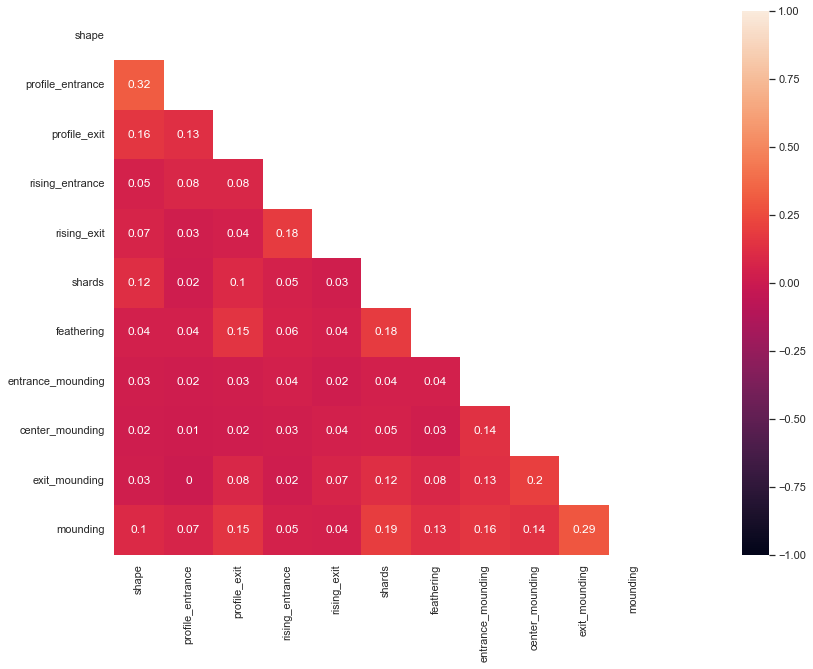

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=-1., vmax=1, square=True, annot=True)

sns.set(rc = {'figure.figsize':(30,10)})

plt.show()